<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-ana-tere-raygoza/blob/main/26ago/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

Entrenamiento lineal completado
Score del conjunto de entrenamiento: 0.881
Score del conjunto de prueba: 0.734
Se obtienen los siguientes coeficientes de determinación:
[0.976, 0.9, 0.903, 0.783, 0.604] 

Max R-Squared: 0.976
Min R-Squared: 0.604
Promedio R-Squared: 0.833
Desviación Estándar: 0.130
Intervalo de confianza 95%: [0.6219 0.9687]

Entrenamiento polinomico completado de grado 2
Score del conjunto de entrenamiento: 0.897
Score del conjunto de prueba: 0.786

Se obtienen los siguientes coeficientes de determinación para la validacion polinomica de grado 2
[0.976, 0.9, 0.903, 0.783, 0.604] 

Max R-Squared: 0.976
Min R-Squared: 0.604
Promedio R-Squared: 0.833
Desviación Estándar: 0.130
Intervalo de confianza 95%: [0.6219 0.9687]

Entrenamiento polinomico completado de grado 3
Score del conjunto de entrenamiento: 0.901
Score del conjunto de prueba: 0.818

Se obtienen los siguientes coeficientes de determinación para la validacion polinomica de grado 3
[0.976, 0.9, 0.903, 0.783, 0.

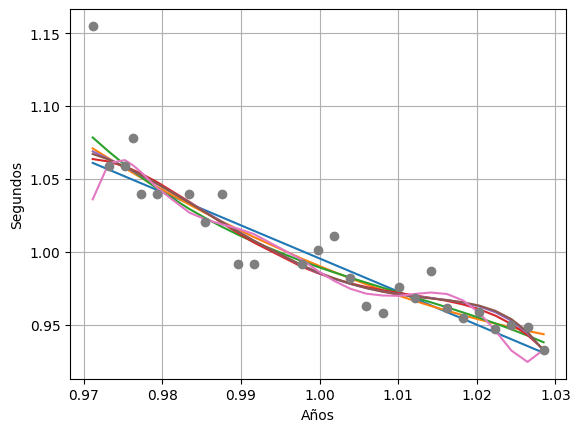

In [ ]:
def size():
  Documento = open('/content/sample_data/olympic100m_men.txt','r')
  a = sum(1 for line in Documento)
  Documento.close()
  return a

filas = size()
f = open('/content/sample_data/olympic100m_men.txt','r')
data = np.zeros([filas,2])
counter = 0
grado_mas_1 = 6
for line in f:
  data[counter] = line.split(',')
  counter = counter + 1
f.close()


X = (data[:,0] / data[:,0].mean()).reshape(-1,1)
y = data[:,1] / data[:,1].mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=68)
def train_model(x_tr, y_tr, x_tst, y_tst):
    try:
        reg = LinearRegression()
        reg.fit(x_tr, y_tr)
    except Exception as e:
        msg = f'Error durante el entrenamiento: {e}'
        raise Exception(msg) from e
    else:
        train_score = reg.score(x_tr, y_tr)
        test_score = reg.score(x_tst, y_tst)
        print('Entrenamiento lineal completado')
        print('Score del conjunto de entrenamiento: {:.3f}'.format(train_score))
        print('Score del conjunto de prueba: {:.3f}'.format(test_score))
        w =  reg.coef_
        b = reg.intercept_
        return w, b

def evaluate_regression_model(X_var, y_var):
    try:
        kf = KFold(n_splits=5, shuffle=True, random_state=68)
        reg = LinearRegression()
        cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)
        if cv_scores is not None:
            cv_scores = [round(num, 3) for num in cv_scores]
            print('Se obtienen los siguientes coeficientes de determinación:')
            print(cv_scores, '\n')
            print(f'Max R-Squared: {max(cv_scores)}')
            print(f'Min R-Squared: {min(cv_scores)}')
            print('Promedio R-Squared: {:.3f}'.format(np.mean(cv_scores)))
            print('Desviación Estándar: {:.3f}'.format(np.std(cv_scores)))
            print(f'Intervalo de confianza 95%: {np.quantile(cv_scores, [0.025, 0.975])}')
    except Exception as e:
        print(e)

def train_model_pol(x_tr, y_tr, x_tst, y_tst, degr):
    try:
        pg = PolynomialFeatures(degree = degr)
        x_tr = pg.fit_transform(x_tr)
        x_tst = pg.fit_transform(x_tst)
        reg = LinearRegression()
        reg.fit(x_tr, y_tr)
    except Exception as e:
        msg = f'Error durante el entrenamiento: {e}'
        raise Exception(msg) from e
    else:
        train_score = reg.score(x_tr, y_tr)
        test_score = reg.score(x_tst, y_tst)
        print('\nEntrenamiento polinomico completado de grado',  degr)
        print('Score del conjunto de entrenamiento: {:.3f}'.format(train_score))
        print('Score del conjunto de prueba: {:.3f}'.format(test_score))
        w =  reg.coef_
        b = reg.intercept_
        return w, b

def evaluate_regression_model_pol(X_var, y_var, degr):
    try:
        kf = KFold(n_splits=5, shuffle=True, random_state=68)
        pg = PolynomialFeatures(degree = degr)
        x_tr = pg.fit_transform(X_train)
        reg = LinearRegression()
        cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)
        if cv_scores is not None:
            cv_scores = [round(num, 3) for num in cv_scores]
            print('\nSe obtienen los siguientes coeficientes de determinación para la validacion polinomica de grado', degr)
            print(cv_scores, '\n')
            print(f'Max R-Squared: {max(cv_scores)}')
            print(f'Min R-Squared: {min(cv_scores)}')
            print('Promedio R-Squared: {:.3f}'.format(np.mean(cv_scores)))
            print('Desviación Estándar: {:.3f}'.format(np.std(cv_scores)))
            print(f'Intervalo de confianza 95%: {np.quantile(cv_scores, [0.025, 0.975])}')
    except Exception as e:
        print(e)

def fun(x,w,b):
  f = 0
  f = w * x + b
  return f

def fun_Pol(x,w,b):
  curva_ajustada = b
  for i in range(len(w)):
    curva_ajustada += w[i] * x**(i)
  return curva_ajustada

w,b = train_model(X_train, y_train, X_test, y_test)
plt.plot(X, fun(X,w,b))
evaluate_regression_model(X, y)
for i in range(grado_mas_1):
  w, b = train_model_pol(X_train, y_train, X_test, y_test, i + 2)
  plt.plot(X, fun_Pol(X,w,b))
  evaluate_regression_model_pol(X, y, i + 2)
plt.plot(X, y, "o")
plt.grid()
plt.xlabel('Años')
plt.ylabel('Segundos')
plt.show()
